In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

# Мы не все делаем "по науке" поэтому чтобы впечатлительные не пугались отключаем вывод предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Пример фильтрации данных.
# Мы хотим удалить все строчки где есть отсутсвующие значения в какой-либо колонке
# Другими словами мы хотим оставить те строки где во всех колонках есть значения

# Для тренировки создадим исскуственный датасет чтобы понять как фильтрация с помощью индексов работает
input_data = {
    'rock': ['basalt', 'basalt', 'tholeiite', 'alkali basalt', 'picrite', 'peridotite'],
    'A':    [ 0.5,      None,     1.2,         0.9,             1.3,        2.0        ],
    'B':    [ 3,        2,        None,        4,               3.5,        1.9        ],
    'C':    [ 7,        4.5,      2,           None,            5.0,        4.9        ],
}
data = pd.DataFrame(input_data)
data

# Ниже весь набор данных

,rock,A,B,C
0,basalt,0.5,3.0,7.0
1,basalt,NaN,2.0,4.5
2,tholeiite,1.2,NaN,2.0
3,alkali basalt,0.9,4.0,NaN
4,picrite,1.3,3.5,5.0
5,peridotite,2.0,1.9,4.9


In [3]:
data.isna() # маска где True там где данные отсутствуют. Тип у маски DataFrame

,rock,A,B,C
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False


In [4]:
# Необходимо получить маску типа DataSeries где True будет в строчках с номерами 1, 2, 3
some_missing_index = data.isna().any(axis=1)
some_missing_index

0    False
1     True
2     True
3     True
4    False
5    False
dtype: bool

In [5]:
# Получим инвертированную маску, т.е. маску где True  ->  False, а Fasle -> True
all_present_index = ~some_missing_index
all_present_index

0     True
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [6]:
# Создадим новую таблицу где для наглядности добавим эти колонки
augmented_data = data.copy() # Полуностью копируем таблицу
augmented_data['has_na'] = some_missing_index
augmented_data['full'] = all_present_index
augmented_data

# Стоит обратить внимание что индексы: some_missing_index и all_present_index имеют такой же размер как и изначальная таблица

,rock,A,B,C,has_na,full
0,basalt,0.5,3.0,7.0,False,True
1,basalt,NaN,2.0,4.5,True,False
2,tholeiite,1.2,NaN,2.0,True,False
3,alkali basalt,0.9,4.0,NaN,True,False
4,picrite,1.3,3.5,5.0,False,True
5,peridotite,2.0,1.9,4.9,False,True


In [7]:
# Будем использовать индекс all_present_index чтобы отбросить строки где есть отсутствующие значения
# т.е. возьмем только те строки где в каждой колонке есть значение
safe_data = data[all_present_index]
safe_data

,rock,A,B,C
0,basalt,0.5,3.0,7.0
4,picrite,1.3,3.5,5.0
5,peridotite,2.0,1.9,4.9


In [8]:
# Ок. Теперь проделаем такую же операцию с реальными данными
data = pd.read_csv('./data/earthchem_download_571.txt', sep='\t')
data.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,EXPEDITION ID,LATITUDE,LONGITUDE,LOC PREC,MAX ELEVATION,MIN ELEVATION,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O,K2O,SR87_SR86,ND143_ND144
0,PETDB-3215-ML-38,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.61,2.09,13.61,NaN,6.93,10.54,2.14,0.35,NaN,NaN
1,PETDB-3215-R130-7.0,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.7408,-155.050,0.0001,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,THOLEIITE,NaN,45.53,1.78,11.15,NaN,18.99,6.97,1.04,0.09,NaN,NaN
2,JS20017-013,NaN,EARTHCHEMDB,"RHODES, J M, 2015",JS20017-013,19.3768,-155.937,0.0001,-1040.0,-1040.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,ALKALI BASALT,NaN,46.81,3.49,15.73,NaN,6.09,8.54,3.59,0.90,NaN,NaN
3,PETDB-3215-ML-259,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.68,2.08,13.83,NaN,6.88,10.52,2.38,0.38,NaN,NaN
4,MOA9902-002-021,NaN,EARTHCHEMDB,"RHODES, J M, 2015",MOA1999,18.6972,-155.771,0.0001,-3600.0,-3600.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,PICRITE,NaN,47.33,1.33,8.67,NaN,21.61,6.89,1.38,0.22,NaN,NaN


In [9]:
# Нас интересуют только следующие колонки: LATITUDE, LONGITUDE, ROCK NAME, SIO2, NA2O, K2O
reduced_data = data[['LATITUDE', 'LONGITUDE', 'ROCK NAME', 'SIO2', 'NA2O', 'K2O']]
reduced_data.head() # Где-то могут быть отсутствующие значения, но с head их пока не видно

,LATITUDE,LONGITUDE,ROCK NAME,SIO2,NA2O,K2O
0,19.3000,-155.500,BASALT,51.61,2.14,0.35
1,19.7408,-155.050,THOLEIITE,45.53,1.04,0.09
2,19.3768,-155.937,ALKALI BASALT,46.81,3.59,0.90
3,19.3000,-155.500,BASALT,51.68,2.38,0.38
4,18.6972,-155.771,PICRITE,47.33,1.38,0.22


In [10]:
# Построим индекс some_missing_index a потом all_present_index как мы это делали выше
some_missing_index = reduced_data.isna().any(axis=1)
all_present_index = ~some_missing_index

In [11]:
print('Кол-во строк с отсутствующими значениями:', some_missing_index.sum())
print('Кол-во строк где все значения есть:', all_present_index.sum())
print('Всего строк в таблице', data.shape) # (кол-во строк, кол-во столбцов)

# О чудо 1492 = 1391 + 101

Кол-во строк с отсутствующими значениями: 101
Кол-во строк где все значения есть: 1391
Всего строк в таблице (1492, 28)


In [12]:
# Построим DataSeries где будет сумма колонок щелочных металлов
alkaline_sum = reduced_data['NA2O'] + reduced_data['K2O'] # DataSeries = DataSeries + DataSeries

# Добавим эту последовательность значений как колонку в DataFrame
reduced_data['ALKALINE'] = alkaline_sum
reduced_data.head()

# На warning если он появился забиваем

,LATITUDE,LONGITUDE,ROCK NAME,SIO2,NA2O,K2O,ALKALINE
0,19.3000,-155.500,BASALT,51.61,2.14,0.35,2.49
1,19.7408,-155.050,THOLEIITE,45.53,1.04,0.09,1.13
2,19.3768,-155.937,ALKALI BASALT,46.81,3.59,0.90,4.49
3,19.3000,-155.500,BASALT,51.68,2.38,0.38,2.76
4,18.6972,-155.771,PICRITE,47.33,1.38,0.22,1.60


In [13]:
# Ниже мы захотим построить графики для каждой породы
# Сделаем это вручную на примере BASALT и THOLEIITE, а позже напишем цикл чтобы для всех пород построить такой график
basalt_data_index = reduced_data['ROCK NAME'] == 'BASALT'
basalt_data = reduced_data[basalt_data_index]

tholeiite_data_index = reduced_data['ROCK NAME'] == 'THOLEIITE'
tholeiite_data = reduced_data[tholeiite_data_index]

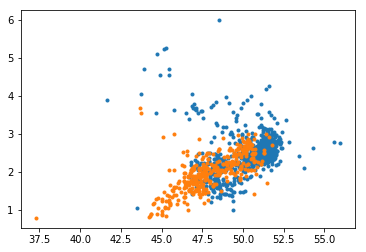

In [14]:
# Строим график
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # На картинке будет один график
ax.plot(basalt_data['SIO2'], basalt_data['ALKALINE'], '.')       # линии не рисуем
ax.plot(tholeiite_data['SIO2'], tholeiite_data['ALKALINE'], '.') # линии не рисуем

['BASALT' 'THOLEIITE' 'ALKALI BASALT' 'PICRITE' 'PERIDOTITE']


Text(0,0.5,'total alkaline: $NA_2O + K_2O$')

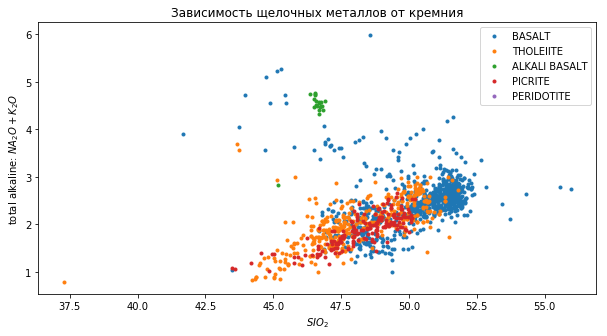

In [15]:
# Автоматизируем процесс построения графиков для всех пород
# Будем строить графики в цикле!

# Получаем какие уникальные значения пород присутствуют в нашем наборе
rock_names = reduced_data['ROCK NAME'].unique()
print(rock_names) # печатаем для наглядности: результатом будет массив из 5 имен

fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(1, 1, 1)

for rock_name in rock_names:
    rock_data_index = reduced_data['ROCK NAME'] == rock_name
    rock_data = reduced_data[rock_data_index] # в rock_data будут только данные по одной породе
    ax.plot(rock_data['SIO2'], rock_data['ALKALINE'], '.', label=rock_name) # label нужен для легенды к графику

ax.legend() # Показываем легенду
ax.set_title('Зависимость щелочных металлов от кремния')
ax.set_xlabel(r'$SIO_2$')
ax.set_ylabel(r'total alkaline: $NA_2O + K_2O$')

In [16]:
# Сохраняем работу в файл, чтобы использовать в публикации или прикрепить в email коллеге 
fig.savefig('alkaline_vs_sio2.jpg')